<h1><i>Machine Learning </i></h1>

<h2> Import </h2>

In [1]:
#import necessary library
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

In [2]:
#import data
transaction = pd.read_csv('Case Study - Transaction.csv', sep=';')
customer = pd.read_csv('Case Study - Customer.csv', sep=';')
store = pd.read_csv('Case Study - Store.csv', sep=';')
product = pd.read_csv('Case Study - Product.csv', sep=';')

<h2> Data Cleaning </h2>

In [3]:
#checking the missing values
def missing_values(df):
  total = df.isnull().sum().sort_values(ascending=False)
  percent = (df.isnull().sum()/df.isnull().count()*100).sort_values(ascending=False)
  mv = pd.concat([total,percent], axis=1, keys=['Total','Percent'])
  print('Columns with missing values: ')
  print(mv[~(mv['Total']==0)])
  return

<h3> Transaction </h3>

In [4]:
#checking missing values on transaction
missing_values(transaction)

Columns with missing values: 
Empty DataFrame
Columns: [Total, Percent]
Index: []


In [5]:
#checking duplicated on transaction
transaction.duplicated().sum()

0

In [6]:
transaction.sample(1)

TransactionID  CustomerID        Date ProductID  Price  Qty  TotalAmount  \
147       TR95284         229  10/01/2022        P2   3200    3         9600   

     StoreID  
147        2

In [7]:
#checking the table info
transaction.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5020 entries, 0 to 5019
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   TransactionID  5020 non-null   object
 1   CustomerID     5020 non-null   int64 
 2   Date           5020 non-null   object
 3   ProductID      5020 non-null   object
 4   Price          5020 non-null   int64 
 5   Qty            5020 non-null   int64 
 6   TotalAmount    5020 non-null   int64 
 7   StoreID        5020 non-null   int64 
dtypes: int64(5), object(3)
memory usage: 313.9+ KB


In [8]:
#changing data type for Date
transaction['Date'] = pd.to_datetime(transaction['Date'], format='%d/%m/%Y')

In [9]:
#transaction table describe
transaction.describe().T

count          mean           std     min      25%      50%  \
CustomerID   5020.0    221.263745    129.672955     1.0    108.0    221.0   
Price        5020.0   9684.800797   4600.708780  3200.0   4200.0   9400.0   
Qty          5020.0      3.644622      1.855295     1.0      2.0      3.0   
TotalAmount  5020.0  32279.482072  19675.462455  7500.0  16000.0  28200.0   
StoreID      5020.0      7.489841      4.028502     1.0      4.0      7.0   

                 75%      max  
CustomerID     332.0    447.0  
Price        15000.0  18000.0  
Qty              5.0     10.0  
TotalAmount  47000.0  88000.0  
StoreID         11.0     14.0

<h3> Customer </h3>

In [10]:
#checking missing values on customer
missing_values(customer)

Columns with missing values: 
                Total   Percent
Marital Status      3  0.671141


In [11]:
#filling the marital status missing values with mode
customer['Marital Status'] = customer['Marital Status'].fillna(customer['Marital Status'].mode()[0])

In [12]:
#rechecking missing values on customer
missing_values(customer)

Columns with missing values: 
Empty DataFrame
Columns: [Total, Percent]
Index: []


In [13]:
#checking duplicated on customer
customer.duplicated().sum()

0

In [14]:
customer.sample(1)

CustomerID  Age  Gender Marital Status Income
106         107   38       1        Married   9,85

In [15]:
#checking the tabel info
customer.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 447 entries, 0 to 446
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   CustomerID      447 non-null    int64 
 1   Age             447 non-null    int64 
 2   Gender          447 non-null    int64 
 3   Marital Status  447 non-null    object
 4   Income          447 non-null    object
dtypes: int64(3), object(2)
memory usage: 17.6+ KB


In [16]:
#changing income data type
customer['Income'] = customer['Income'].str.replace(',','.').astype(float)

In [17]:
#customer table describe
customer.describe().T

count        mean         std  min      25%     50%     75%    max
CustomerID  447.0  224.000000  129.182042  1.0  112.500  224.00  335.50  447.0
Age         447.0   39.782998   12.848719  0.0   30.000   39.00   50.50   72.0
Gender      447.0    0.458613    0.498842  0.0    0.000    0.00    1.00    1.0
Income      447.0    8.592103    6.607065  0.0    4.175    7.52   10.81   71.3

In [18]:
c_cat = customer.select_dtypes(exclude='number')
c_cat.describe().T

count unique      top freq
Marital Status   447      2  Married  343

<h3> Store </h3>

In [19]:
#checking missing values on store
missing_values(store)

Columns with missing values: 
Empty DataFrame
Columns: [Total, Percent]
Index: []


In [20]:
#checking duplicated on store
store.duplicated().sum()

0

In [21]:
store.sample(1)

StoreID StoreName GroupStore          Type Latitude  Longitude
13       14  Priangan   Priangan  Modern Trade    -5,45  105,26667

In [22]:
#checking table info
store.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14 entries, 0 to 13
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   StoreID     14 non-null     int64 
 1   StoreName   14 non-null     object
 2   GroupStore  14 non-null     object
 3   Type        14 non-null     object
 4   Latitude    14 non-null     object
 5   Longitude   14 non-null     object
dtypes: int64(1), object(5)
memory usage: 804.0+ bytes


In [23]:
#changing Latitude and Longitude data type
store['Latitude'] = store['Latitude'].str.replace(',','.').astype(float)
store['Longitude'] = store['Longitude'].str.replace(',','.').astype(float)

<h3> Product </h3>

In [24]:
#checking missing values on product
missing_values(product)

Columns with missing values: 
Empty DataFrame
Columns: [Total, Percent]
Index: []


In [25]:
#checking duplicated on product
product.duplicated().sum()

0

In [26]:
product.sample(1)

ProductID Product Name  Price
0        P1    Choco Bar   8800

In [27]:
#checking table info
product.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   ProductID     10 non-null     object
 1   Product Name  10 non-null     object
 2   Price         10 non-null     int64 
dtypes: int64(1), object(2)
memory usage: 372.0+ bytes


<h2> Joining Data </h2>

In [28]:
#join data

#joining transaction with customer
merge1 = pd.merge(transaction, customer, on='CustomerID', how='inner')

#adding product data
merge2 = pd.merge(merge1, product, on='ProductID', how='inner')

#adding store data
df = pd.merge(merge2, store, on='StoreID', how='inner')

df.sample(5)

TransactionID  CustomerID       Date ProductID  Price_x  Qty  \
3561       TR17988         112 2022-01-13        P6    18000    1   
1129       TR12826         167 2022-08-10        P8    16000    1   
3416       TR37642           3 2022-07-07        P7     9400    4   
2343       TR67399         436 2022-11-21        P7     9400    5   
2822       TR33616         233 2022-07-18       P10    15000    1   

      TotalAmount  StoreID  Age  Gender Marital Status  Income  Product Name  \
3561        18000        2   31       1        Married    4.44        Cashew   
1129        16000        1   28       1        Married    2.91           Oat   
3416        37600        2   32       1        Married    9.17  Coffee Candy   
2343        47000        9   51       1        Married   18.89  Coffee Candy   
2822        15000        3   43       1        Married    5.69  Cheese Stick   

      Price_y         StoreName GroupStore          Type  Latitude   Longitude  
3561    18000  Prima Kelapa Dua      Prima  Modern Trade -6.914864  107.608238  
1129    16000     Prima Tendean      Prima  Modern Trade -6.200000  106.816666  
3416     9400  Prima Kelapa Dua      Prima  Modern Trade -6.914864  107.608238  
2343     9400            Lingga     Lingga  Modern Trade -3.654703  128.190643  
2822    15000        Prima Kota      Prima  Modern Trade -7.797068  110.370529

<h2> Cleaning Data </h2>

In [29]:
#rename price column
df.rename(columns={'Price_x':'Price'}, inplace=True)

In [30]:
#drop duplicated column
df.drop('Price_y', axis=1, inplace=True)

In [31]:
#re-checking the missing values
missing_values(df)

Columns with missing values: 
Empty DataFrame
Columns: [Total, Percent]
Index: []


In [32]:
df.shape

(5020, 18)

In [33]:
#filling the marital status missing values with mode
df['Marital Status'] = df['Marital Status'].fillna(df['Marital Status'].mode()[0])

In [34]:
#re-checking missing values
missing_values(df)

Columns with missing values: 
Empty DataFrame
Columns: [Total, Percent]
Index: []


In [35]:
#re-checking the duplicated row(s)
df.duplicated().sum()

0

In [36]:
#re-checking table info
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5020 entries, 0 to 5019
Data columns (total 18 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   TransactionID   5020 non-null   object        
 1   CustomerID      5020 non-null   int64         
 2   Date            5020 non-null   datetime64[ns]
 3   ProductID       5020 non-null   object        
 4   Price           5020 non-null   int64         
 5   Qty             5020 non-null   int64         
 6   TotalAmount     5020 non-null   int64         
 7   StoreID         5020 non-null   int64         
 8   Age             5020 non-null   int64         
 9   Gender          5020 non-null   int64         
 10  Marital Status  5020 non-null   object        
 11  Income          5020 non-null   float64       
 12  Product Name    5020 non-null   object        
 13  StoreName       5020 non-null   object        
 14  GroupStore      5020 non-null   object        
 15  Type

In [37]:
#Deleting unnecessary columns
'''delete_columns = ['TransactionID','CustomerID','ProductID','StoreID']
df.drop(delete_columns, axis=1, inplace=True)
df.sample(2)'''

"delete_columns = ['TransactionID','CustomerID','ProductID','StoreID']\ndf.drop(delete_columns, axis=1, inplace=True)\ndf.sample(2)"

In [38]:
print('Min date from dataset: %s' % df['Date'].min().date())
print('Max date from dataset: %s' % df['Date'].max().date())

Min date from dataset: 2022-01-01
Max date from dataset: 2022-12-31


<h2> Outliers </h2>

In [39]:
#showing data describe only the mean and median, min and max
df.describe().loc[['mean', '50%','min','max']].T

mean           50%          min           max
CustomerID     221.263745    221.000000     1.000000    447.000000
Price         9684.800797   9400.000000  3200.000000  18000.000000
Qty              3.644622      3.000000     1.000000     10.000000
TotalAmount  32279.482072  28200.000000  7500.000000  88000.000000
StoreID          7.489841      7.000000     1.000000     14.000000
Age             40.003586     39.000000     0.000000     72.000000
Gender           0.452988      0.000000     0.000000      1.000000
Income           8.623713      7.720000     0.000000     71.300000
Latitude        -2.942236     -5.135399    -7.797068      5.548290
Longitude      109.600789    110.370529    95.323753    128.190643

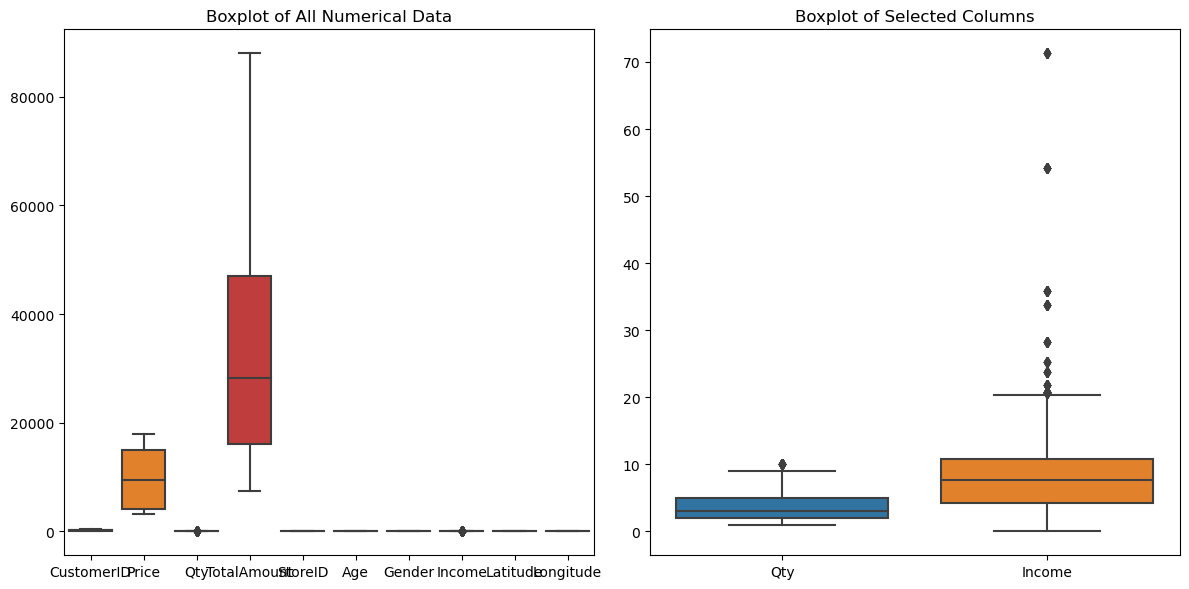

In [40]:
#get to know the outliers with the box plot visualization
boxplot_data = ['Qty','Income']

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=[12, 6])

sns.boxplot(data=df, ax=ax1)
ax1.set_title("Boxplot of All Numerical Data")

sns.boxplot(data=df[boxplot_data], ax=ax2)
ax2.set_title("Boxplot of Selected Columns")

#make sure the plot not overlap
plt.tight_layout()

<Axes: xlabel='Age', ylabel='Count'>

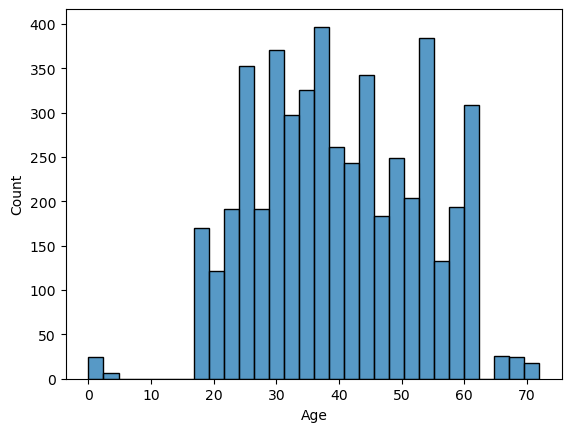

In [41]:
#showing the distribution of the Age
#there's no outliers in Age, but from the product, it something impossible consumed by under age child.
sns.histplot(df, x='Age')

<Axes: xlabel='Age', ylabel='Count'>

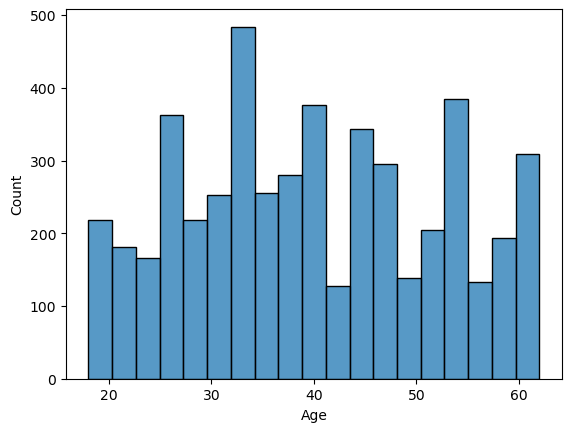

In [42]:
#getting data with condition 18<= Age >= 62
df2 = df.loc[(df['Age'] >= 18) & (df['Age'] <= 62)]
sns.histplot(df2, x='Age')

<Axes: xlabel='Qty'>

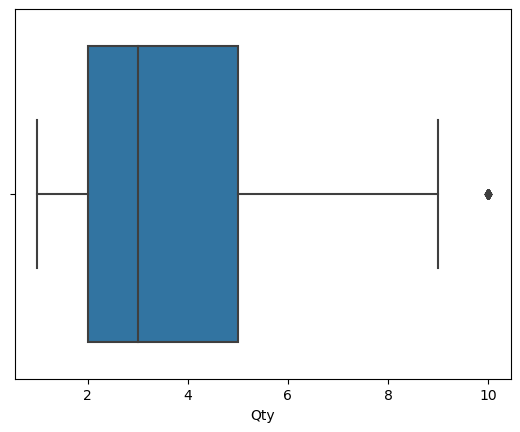

In [43]:
#quantity in outlier
sns.boxplot(df2, x='Qty')

<Axes: xlabel='Qty'>

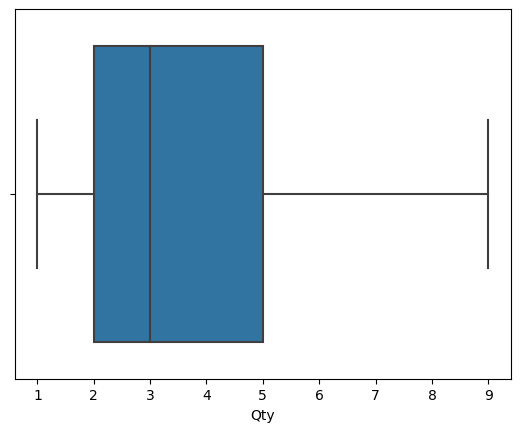

In [44]:
#remove rows with quantity >9
df2 = df2.loc[(df2['Qty'] <= 9)]
sns.boxplot(df2,x='Qty')

<Axes: xlabel='Income'>

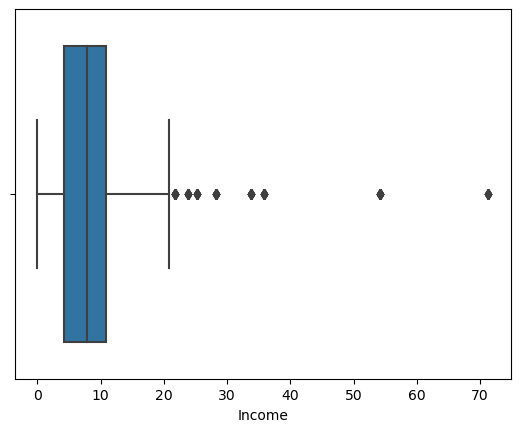

In [45]:
sns.boxplot(df2, x='Income')

<Axes: xlabel='Income'>

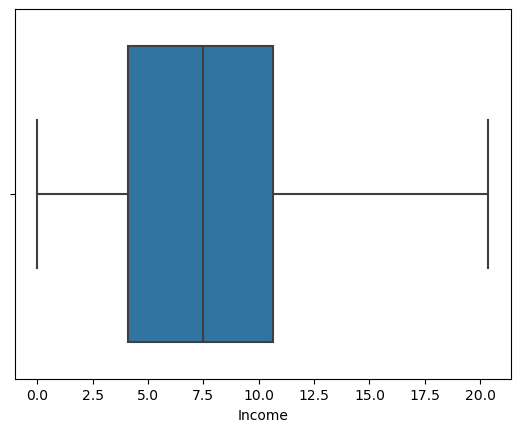

In [46]:
Q1 = df['Income'].quantile(0.25)
Q3 = df['Income'].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

df2 = df2.loc[(df2['Income'] >= lower_bound) & (df2['Income'] <= upper_bound)]

sns.boxplot(df2,x='Income')

<h1> Time Series </h1>
<h3> <i>Predicting the daily total quantity of the product sold</i> </h3>

<h2> Visualization </h2>

In [47]:
!pip install chart_studio

Active code page: 1252


In [48]:
import chart_studio.plotly as py
import plotly.graph_objs as go
from plotly.offline import init_notebook_mode, iplot

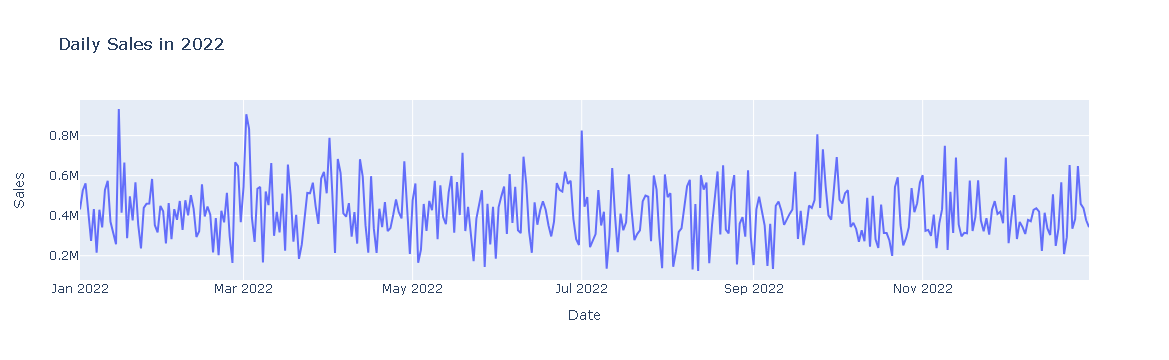

In [49]:
daily_sales = df2.groupby(['Date'],as_index=False).agg({'TotalAmount':'sum'})
daily_sales_plot = go.Scatter(x=daily_sales['Date'], y=daily_sales['TotalAmount'])
layout = go.Layout(title='Daily Sales in 2022', xaxis=dict(title='Date'), yaxis=dict(title='Sales'))
fig = go.Figure(data=[daily_sales_plot], layout=layout)
iplot(fig)

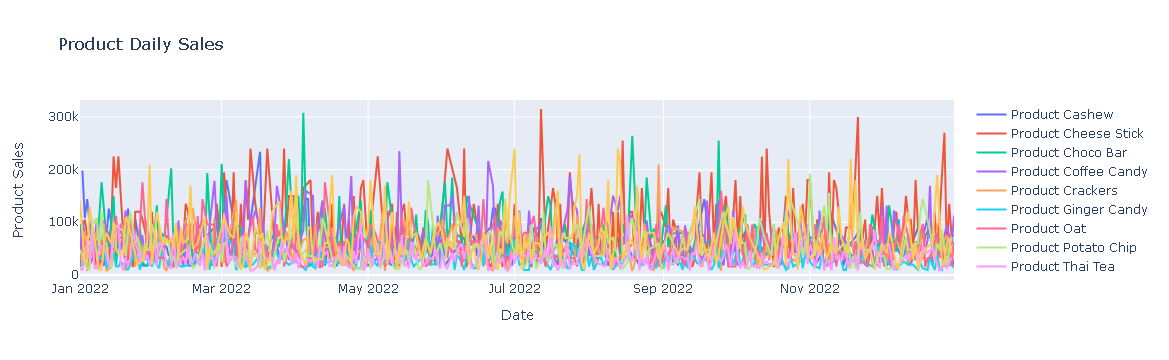

In [50]:
daily_product = df2.groupby(['Product Name','Date'], as_index=False).agg({'TotalAmount':'sum'})
product_sales = []
for products in daily_product['Product Name'].unique():
    current_product_sales = daily_product[(daily_product['Product Name']==products)]
    product_sales.append(go.Scatter(x=current_product_sales['Date'], y=current_product_sales['TotalAmount'], name=('Product %s' % products)))

layout = go.Layout(title='Product Daily Sales', xaxis=dict(title='Date'), yaxis=dict(title='Product Sales'))
fig = go.Figure(data=product_sales, layout=layout)
iplot(fig)

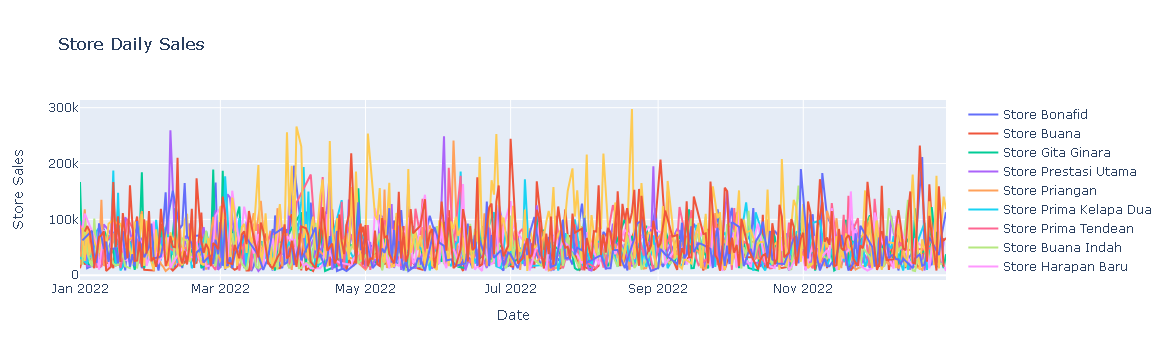

In [51]:
daily_store = df2.groupby(['Date','StoreName'], as_index=False).agg({'TotalAmount':'sum'})
store_sales = []
for stores in daily_store['StoreName'].unique():
    current_store_sales = daily_store[(daily_store['StoreName'])==stores]
    store_sales.append(go.Scatter(x=current_store_sales['Date'], y=current_store_sales['TotalAmount'], name=('Store %s' % stores)))

layout = go.Layout(title='Store Daily Sales', xaxis=dict(title='Date'), yaxis=dict(title='Store Sales'))
fig = go.Figure(data=store_sales, layout=layout)
iplot(fig)

 <h2> Creating Dataset for Modeling </h2>

In [52]:
df2.sample(2)

TransactionID  CustomerID       Date ProductID  Price  Qty  TotalAmount  \
1266       TR54845          46 2022-12-03        P7   9400    4        37600   
2890       TR19851           3 2022-07-08        P4  12000    3        36000   

      StoreID  Age  Gender Marital Status  Income  Product Name  \
1266        1   36       1        Married    8.31  Coffee Candy   
2890        3   32       1        Married    9.17   Potato Chip   

          StoreName GroupStore          Type  Latitude   Longitude  
1266  Prima Tendean      Prima  Modern Trade -6.200000  106.816666  
2890     Prima Kota      Prima  Modern Trade -7.797068  110.370529

In [53]:
#first we sort the Date to make it clear that we have ascending order Date
#then we make grouping and aggregation by Date and sum the quantity
ts = df2.sort_values('Date').groupby('Date', as_index=False).agg({'Qty':'sum'})
ts.sample(2)

Date  Qty
255 2022-09-13   53
242 2022-08-31   36

<h2> Time Series Preparing </h2>

<h3> Time series plot </h3>

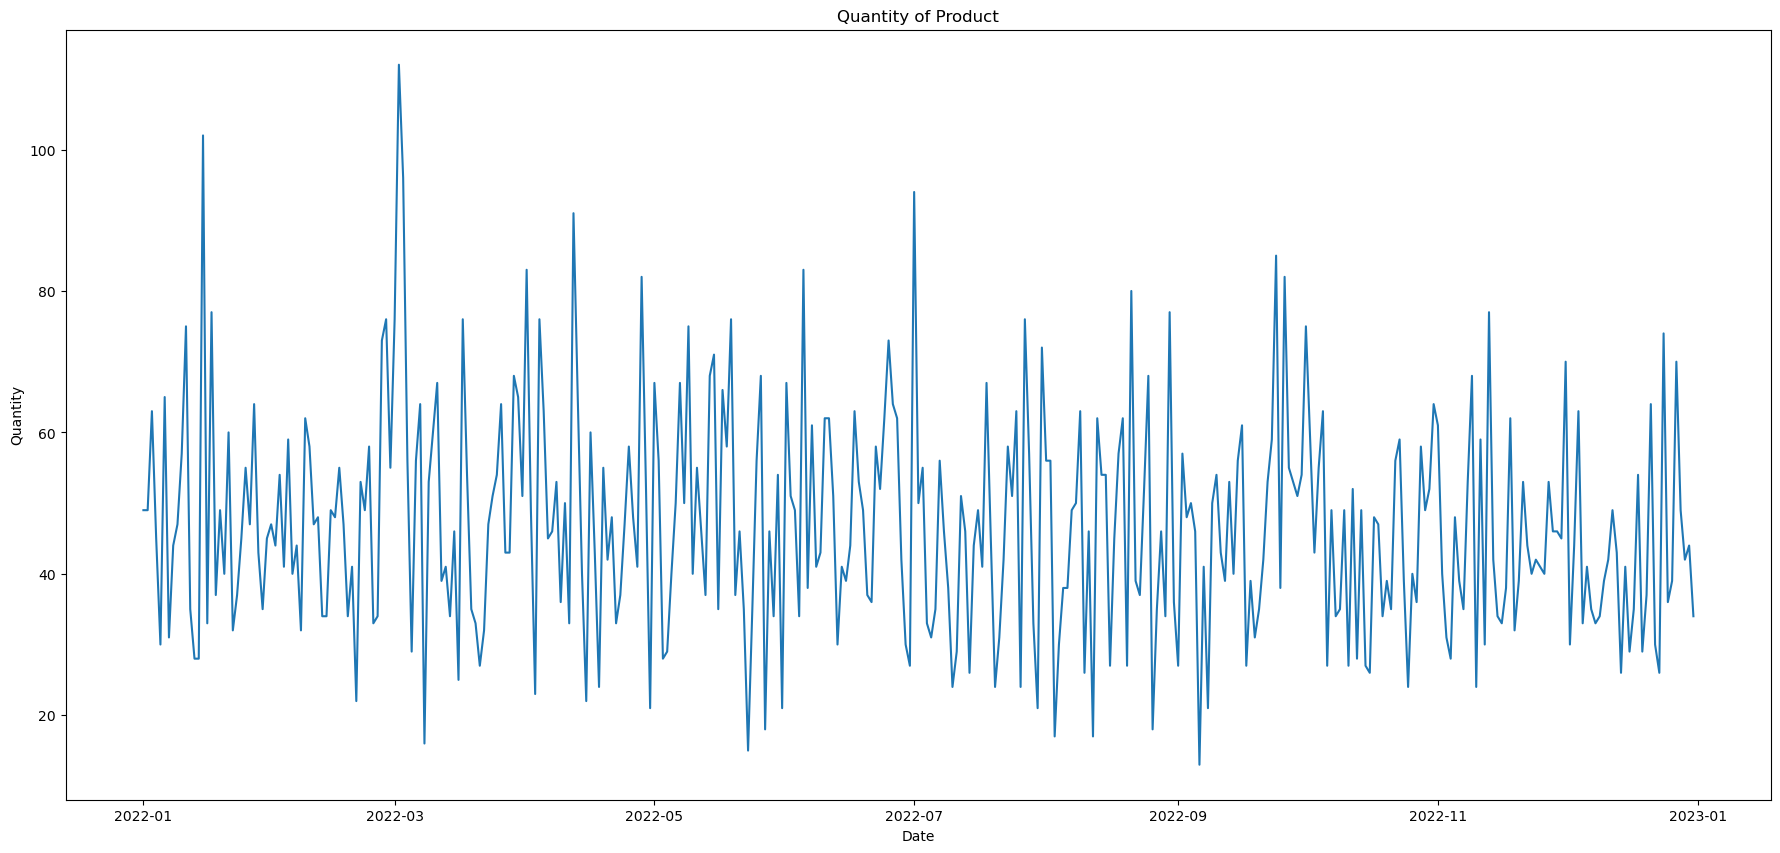

In [54]:
#time series plot

plt.figure(figsize=(22,10))
plt.plot(ts['Date'],ts['Qty'])
plt.title('Quantity of Product')
plt.xlabel('Date')
plt.ylabel('Quantity')

timeseries = ts.loc[:, ['Date','Qty']]
timeseries.index = timeseries['Date']
timeseries2 = timeseries.drop('Date', axis=1)

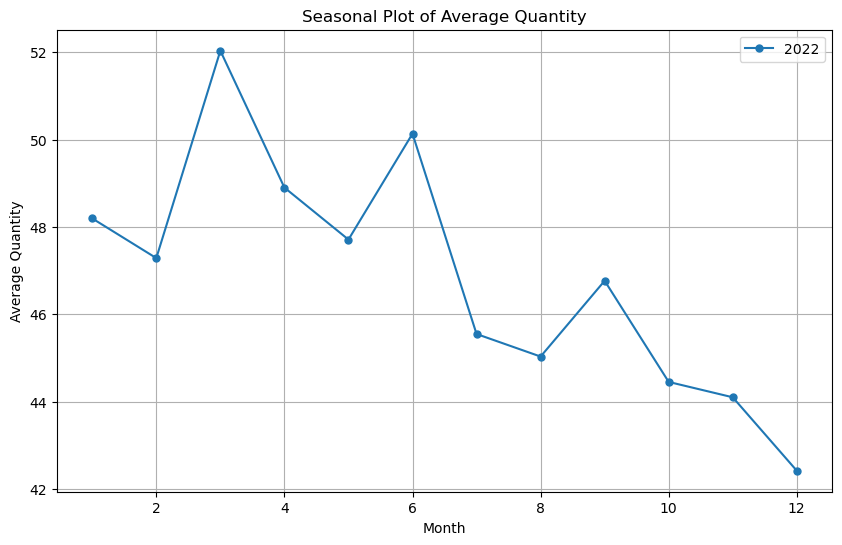

In [55]:
#seasonal plot
sp = ts.copy()
sp['Date'] = pd.to_datetime(sp['Date'])

sp['Year'] = sp['Date'].dt.year
sp['Month'] = sp['Date'].dt.month

average_quantity = sp.groupby(['Year', 'Month'], as_index=False).agg({'Qty':'mean'})

pivot_data = average_quantity.pivot(index='Month', columns='Year', values='Qty')

plt.figure(figsize=(10, 6))
plt.plot(pivot_data, marker='o', markersize=5)
plt.xlabel('Month')
plt.ylabel('Average Quantity')
plt.title('Seasonal Plot of Average Quantity')
plt.legend(pivot_data.columns)
plt.grid(True)

<h2> Stationary Check</h2>

<h3>Rolling Statistic</h3>

In [56]:
ts.sample(2)

Date  Qty
134 2022-05-15   71
72  2022-03-14   34

In [57]:
#make new variable
data = ts.copy()

#change the Date into datetime datatype
data['Date'] = pd.to_datetime(data['Date'])

#make the Date column as index
data = data.set_index(['Date'])
data = np.log(data)
data.sample(2)

Qty
Date                
2022-08-18  4.043051
2022-04-29  3.970292

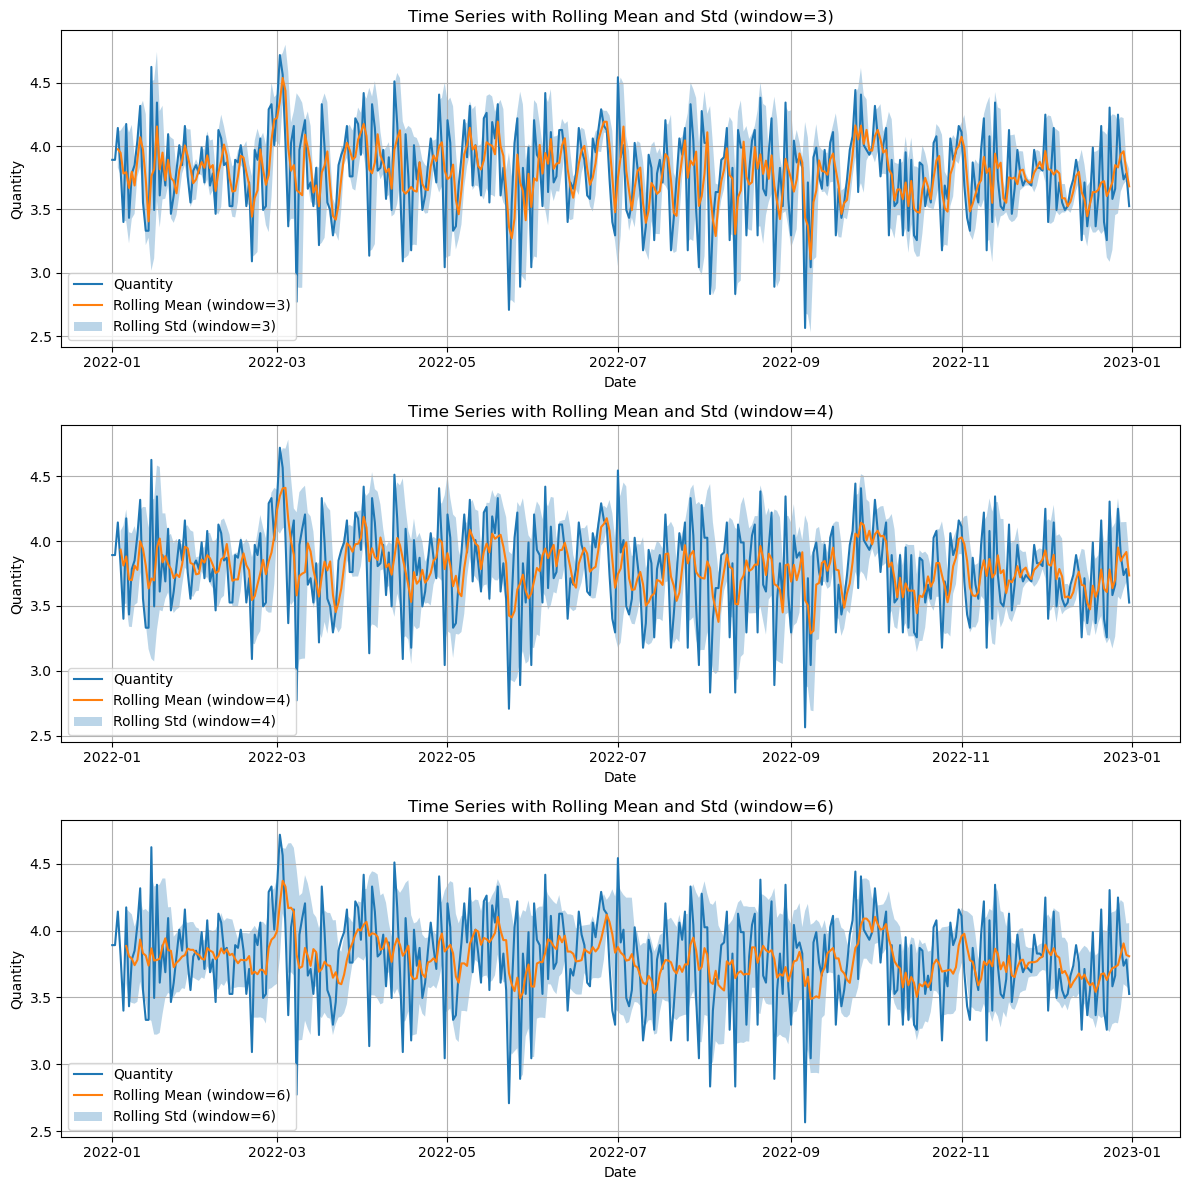

In [58]:
#calculating rolling mean and standard deviation with different values of window
rolling_mean_3 = data['Qty'].rolling(window=3).mean()
rolling_mean_4 = data['Qty'].rolling(window=4).mean()
rolling_mean_6 = data['Qty'].rolling(window=6).mean()

rolling_std_3 = data['Qty'].rolling(window=3).std()
rolling_std_4 = data['Qty'].rolling(window=4).std()
rolling_std_6 = data['Qty'].rolling(window=6).std()

#make the visualization
plt.figure(figsize=(12, 12))

#subplot 1: window=3
plt.subplot(311)
plt.plot(data['Qty'], label='Quantity')
plt.plot(rolling_mean_3, label='Rolling Mean (window=3)')
plt.fill_between(data.index, rolling_mean_3 - rolling_std_3, rolling_mean_3 + rolling_std_3,
                 alpha=0.3, label='Rolling Std (window=3)')
plt.xlabel('Date')
plt.ylabel('Quantity')
plt.title('Time Series with Rolling Mean and Std (window=3)')
plt.legend()
plt.grid(True)

#subplot 2: window=4
plt.subplot(312)
plt.plot(data['Qty'], label='Quantity')
plt.plot(rolling_mean_4, label='Rolling Mean (window=4)')
plt.fill_between(data.index, rolling_mean_4 - rolling_std_4, rolling_mean_4 + rolling_std_4,
                 alpha=0.3, label='Rolling Std (window=4)')
plt.xlabel('Date')
plt.ylabel('Quantity')
plt.title('Time Series with Rolling Mean and Std (window=4)')
plt.legend()
plt.grid(True)

#subplot 3: window=6
plt.subplot(313)
plt.plot(data['Qty'], label='Quantity')
plt.plot(rolling_mean_6, label='Rolling Mean (window=6)')
plt.fill_between(data.index, rolling_mean_6 - rolling_std_6, rolling_mean_6 + rolling_std_6,
                 alpha=0.3, label='Rolling Std (window=6)')
plt.xlabel('Date')
plt.ylabel('Quantity')
plt.title('Time Series with Rolling Mean and Std (window=6)')
plt.legend()
plt.grid(True)

plt.tight_layout()

Our data is stationer

<h3> Augmented Dickey-Fuller (ADF) </h3>

In [59]:
import statsmodels.api as sm
import statsmodels.tsa.api as smt
from statsmodels.tsa.stattools import adfuller

In [60]:
#test with ADF
adf = adfuller(data['Qty'], autolag='AIC')

adf_output = pd.Series(adf[0:4], index=['Test Statistic','p-value','Lags Used','No. of Obs'])

for key,value in adf[4].items():
    adf_output['Critical Value (%s)'%key] = value

print('ADF test: ')
print(adf_output)

ADF test: 
Test Statistic          -19.328860
p-value                   0.000000
Lags Used                 0.000000
No. of Obs              364.000000
Critical Value (1%)      -3.448443
Critical Value (5%)      -2.869513
Critical Value (10%)     -2.571018
dtype: float64


<ul>ADF test interprete:
    <li>Test Statistic:
        <p>-19.448086 is highly negative value and indicates strong evidence to against the null hypothesis of non-stationarity</p></li>
    <li>p-value:
        <p>0.000000 represents strong evidence against the null hypothesis</p></li>
    <li>Lag Used:
        <p>0.000000 indicates no lags were used</p></li>
</ul>
<b>Summary:</b><br>
ADF test provides strong evidence that this data is stationary which is a desirable property for time series modeling and forecasting

<h2> Decomposition and Autocorrelation Function </h2>

<h3> Decomposition </h3>

In [61]:
from statsmodels.tsa.seasonal import seasonal_decompose

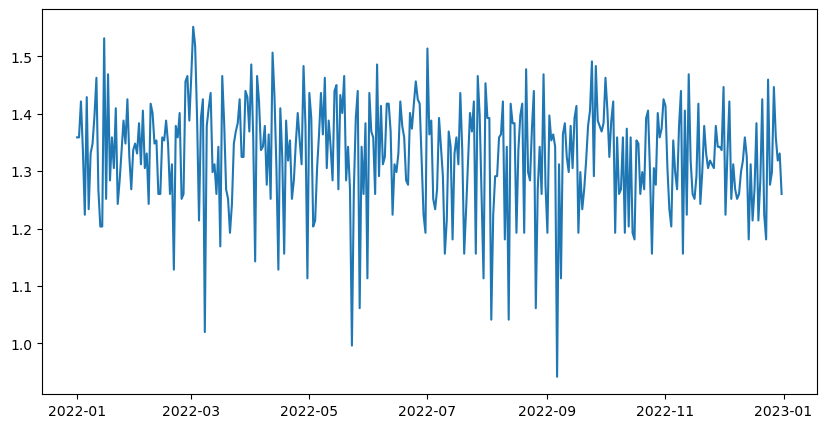

In [62]:
plt.figure(figsize=(10,5))
data_log=np.log(data) 
plt.plot(data_log)

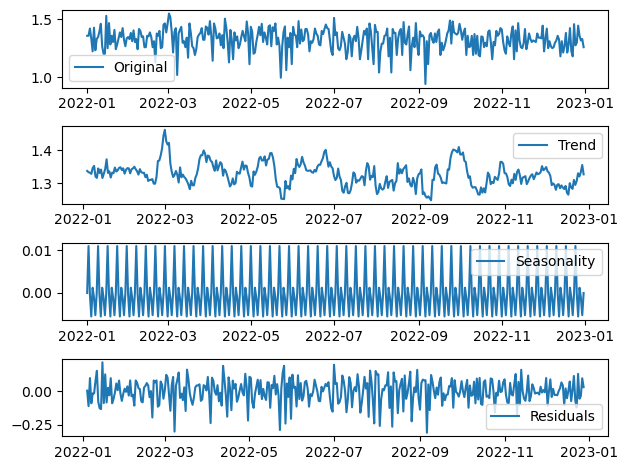

In [63]:
#we want to break down the time series data into trend, seasonality and residual
decomposition = seasonal_decompose(data_log)

#trend = long-term pattern
trend = decomposition.trend
#seasonal = periodic pattern
seasonal = decomposition.seasonal
#residual = random fluctuation and irregular patterns
residual = decomposition.resid

#visualization with multiplot
#subplot 1: original data
plt.subplot(411)
plt.plot(data_log, label='Original')
plt.legend(loc='best')
#subplot 2: trend
plt.subplot(412)
plt.plot(trend, label='Trend')
plt.legend(loc='best')
#subplot 3: seasonal
plt.subplot(413)
plt.plot(seasonal, label='Seasonality')
plt.legend(loc='best')
#subplot 4: residual
plt.subplot(414)
plt.plot(residual, label='Residuals')
plt.legend(loc='best')
plt.tight_layout()

<ul> Decomposition Visualization Insight:
    <li>There's no upward or downward trend</li>
    <li>Daily seasonality</li>

<h3> Autocorrelation Function (ACF) and Partial Autocorrelation Function (PACF)</h3>

In [64]:
from statsmodels.tsa.stattools import acf, pacf 

In [65]:
data_shift = data_log-data_log.shift()

#drop NA values from shifting
data_shift = data_shift.dropna()

Text(0.5, 1.0, 'Partial Autocorrelation Function / PACF')

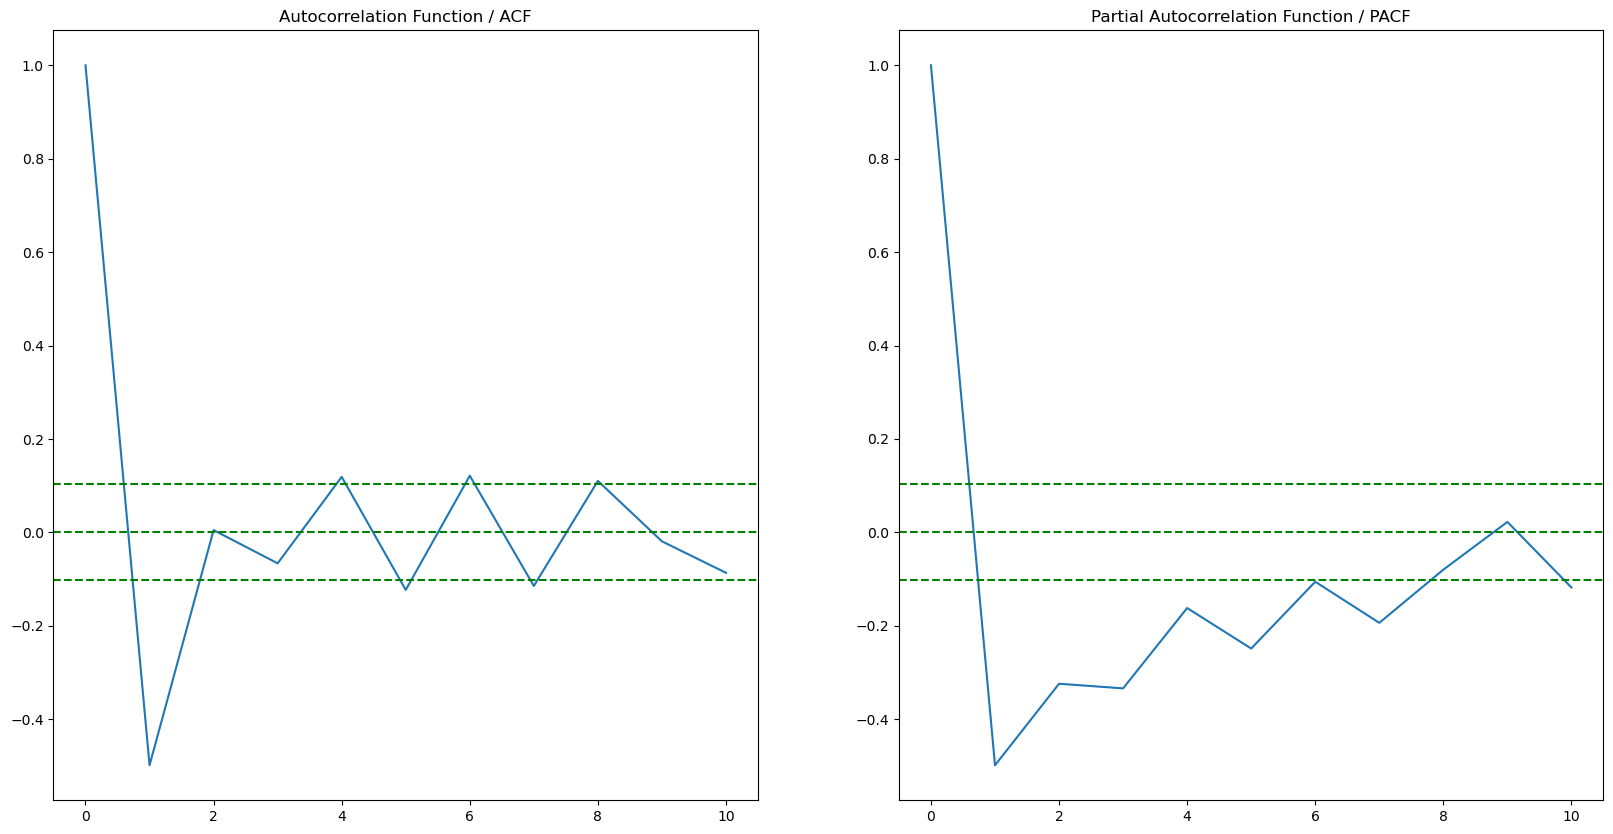

In [66]:
lag_acf = acf(data_shift, nlags=10)
lag_pacf = pacf(data_shift, nlags=10, method='ols')

#ACF plot
plt.figure(figsize=(20,10))
plt.subplot(121)
plt.plot(lag_acf)
plt.axhline(y=0,linestyle='--',color='green')
plt.axhline(y=-1.96/np.sqrt(len(data_shift)),linestyle='--',color='green') # y = -0.16
plt.axhline(y=1.96/np.sqrt(len(data_shift)),linestyle='--',color='green') # y = 0.16
plt.title('Autocorrelation Function / ACF')

#PACF plot
plt.subplot(122)
plt.plot(lag_pacf)
plt.axhline(y=0,linestyle='--',color='green')
plt.axhline(y=-1.96/np.sqrt(len(data_shift)),linestyle='--',color='green') # y = -0.16
plt.axhline(y=1.96/np.sqrt(len(data_shift)),linestyle='--',color='green') # y = 0.16
plt.title('Partial Autocorrelation Function / PACF')

<li>p = 9</li>
<li>q = 2</li>

<h2> Splitting Dataset </h2>

In [67]:
train = data[:int(len(data)*0.80)]
test = data[int(len(data)*0.80):]

In [68]:
print('train shape: ',train.shape)
print('test shape: ',test.shape)

train shape:  (292, 1)
test shape:  (73, 1)


<h2> ARIMA </h2>

<b> ARIMA: Autoregressive Integrated Moving Average Model </b>
<p>Forecasting algorithm based on the information of the past values, lags and the lagged forecast errors. Any <i>non-seasonal</i> time series that exhibit patterns and is not a random white noise could use this models.
<ul>ARIMA 3 parameters:
    <li><b>p</b> is the order of the AR term
    <p>p or AR (autoregression) is a regression model that utiliza the dependent relationship between current observation and observation over a previous period.<br>
        We identify AR with PACF
    </li>
    <li><b>d</b> is the number of differencing required to make the time series stationary
    <p>d or I (integration) uses differencing of observations in order to make the time series stationary. If the time series is already stationary, d=0</li>
    <li><b>q</b> is the order of MA term
    <p>q or MA (moving average) is a model that uses the dependency between an observation and residual error from MA model applied to lagged observations</li>

In [69]:
from statsmodels.tsa.arima.model import ARIMA

In [70]:
#AR model
model = ARIMA(train['Qty'], order=(9,0,0))
ar_model = model.fit()
ar_model.summary()

E:\Program Files\Anaconda\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.

E:\Program Files\Anaconda\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.

E:\Program Files\Anaconda\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.



<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                    Qty   No. Observations:                  292
Model:                 ARIMA(9, 0, 0)   Log Likelihood                -112.791
Date:                Thu, 27 Jul 2023   AIC                            247.581
Time:                        20:48:13   BIC                            288.026
Sample:                    01-01-2022   HQIC                           263.782
                         - 10-19-2022                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          3.8020      0.026    146.776      0.000       3.751       3.853
ar.L1          0.0114      0.063      0.180      0.857      -0.112       0.135
ar.L2         -0.0361      0.062     -0.579      0.563      -0.158       0.086
ar.L3         -0.0476      0.065     -0.733      0.464      -0.175       0.080
ar.L4          0.0898      0.054      1.652      0.099      -0.017       0.196
ar.L5         -0.0288      0.062     -0.466      0.641      -0.150       0.092
ar.L6          0.0947      0.062      1.527      0.127      -0.027       0.216
ar.L7         -0.0041      0.064     -0.064      0.949      -0.129       0.121
ar.L8          0.0876      0.064      1.363      0.173      -0.038       0.213
ar.L9         -0.0489      0.055     -0.883      0.377      -0.157       0.060
sigma2         0.1267      0.010     12.191      0.000       0.106       0.147
===================================================================================
Ljung-Box (L1) (Q):                   0.01   Jarque-Bera (JB):                18.05
Prob(Q):                              0.91   Prob(JB):                         0.00
Heteroskedasticity (H):               1.25   Skew:                            -0.54
Prob(H) (two-sided):                  0.27   Kurtosis:                         3.56
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

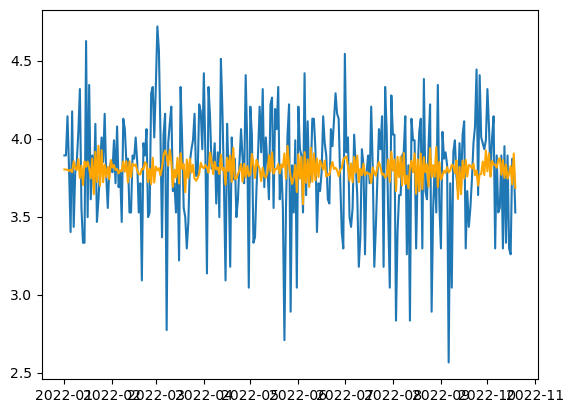

In [71]:
plt.plot(train)
plt.plot(ar_model.fittedvalues, color='orange')

In [72]:
#MA model
model = ARIMA(train['Qty'], order=(0,0,2))
ma_model = model.fit()
ma_model.summary()

E:\Program Files\Anaconda\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.

E:\Program Files\Anaconda\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.

E:\Program Files\Anaconda\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.



<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                    Qty   No. Observations:                  292
Model:                 ARIMA(0, 0, 2)   Log Likelihood                -117.821
Date:                Thu, 27 Jul 2023   AIC                            243.642
Time:                        20:48:14   BIC                            258.349
Sample:                    01-01-2022   HQIC                           249.533
                         - 10-19-2022                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          3.8024      0.022    171.225      0.000       3.759       3.846
ma.L1         -0.0081      0.061     -0.133      0.894      -0.128       0.112
ma.L2         -0.0151      0.060     -0.250      0.802      -0.134       0.103
sigma2         0.1312      0.011     12.379      0.000       0.110       0.152
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):                13.99
Prob(Q):                              0.99   Prob(JB):                         0.00
Heteroskedasticity (H):               1.23   Skew:                            -0.50
Prob(H) (two-sided):                  0.31   Kurtosis:                         3.38
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

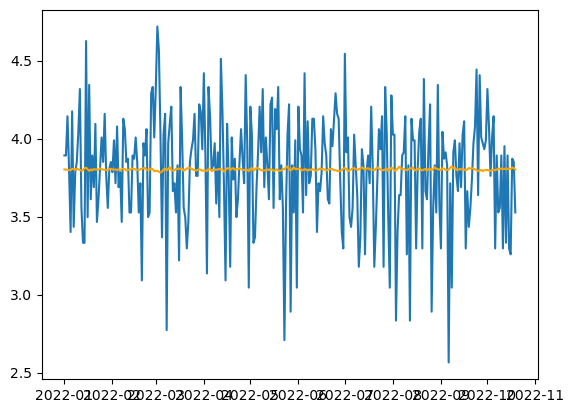

In [73]:
plt.plot(train)
plt.plot(ma_model.fittedvalues, color='orange')

In [74]:
#arima model
model = ARIMA(train['Qty'], order=(9,0,2))
model_result = model.fit()
model_result.summary()

E:\Program Files\Anaconda\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.

E:\Program Files\Anaconda\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.

E:\Program Files\Anaconda\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.

E:\Program Files\Anaconda\Lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                    Qty   No. Observations:                  292
Model:                 ARIMA(9, 0, 2)   Log Likelihood                -110.316
Date:                Thu, 27 Jul 2023   AIC                            246.632
Time:                        20:48:17   BIC                            294.430
Sample:                    01-01-2022   HQIC                           265.778
                         - 10-19-2022                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          3.8025      0.026    148.015      0.000       3.752       3.853
ar.L1          0.1771      0.180      0.984      0.325      -0.175       0.530
ar.L2         -0.7935      0.170     -4.665      0.000      -1.127      -0.460
ar.L3         -0.0352      0.084     -0.418      0.676      -0.201       0.130
ar.L4          0.0781      0.079      0.989      0.322      -0.077       0.233
ar.L5         -0.0867      0.089     -0.971      0.332      -0.262       0.088
ar.L6          0.1752      0.084      2.089      0.037       0.011       0.340
ar.L7         -0.0498      0.082     -0.606      0.545      -0.211       0.111
ar.L8          0.1564      0.075      2.094      0.036       0.010       0.303
ar.L9         -0.0708      0.067     -1.055      0.291      -0.202       0.061
ma.L1         -0.1689      0.170     -0.995      0.320      -0.502       0.164
ma.L2          0.7780      0.175      4.437      0.000       0.434       1.122
sigma2         0.1245      0.010     12.289      0.000       0.105       0.144
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):                23.96
Prob(Q):                              1.00   Prob(JB):                         0.00
Heteroskedasticity (H):               1.26   Skew:                            -0.61
Prob(H) (two-sided):                  0.25   Kurtosis:                         3.70
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

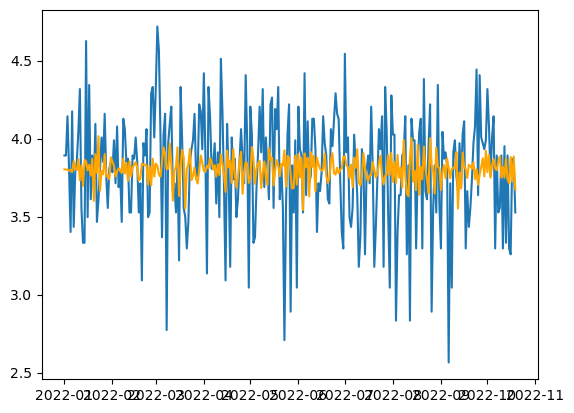

In [75]:
plt.plot(train)
plt.plot(model_result.fittedvalues, color='orange')

Text(0, 0.5, 'Quantity')

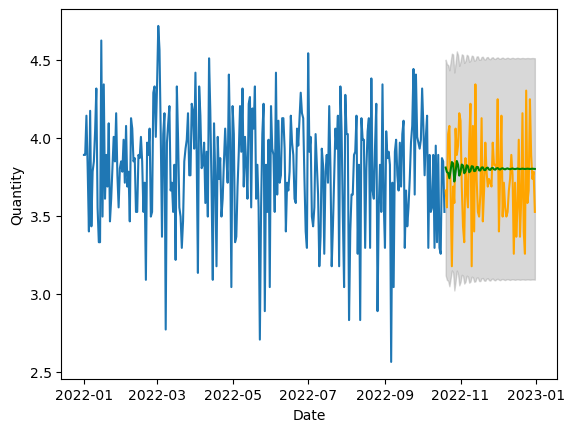

In [76]:
#try to use our forecast
forecast = model_result.get_forecast(steps=len(test))
fc_series = forecast.predicted_mean
confidence_intervals = forecast.conf_int()

lower_series = confidence_intervals.iloc[:, 0]
upper_series = confidence_intervals.iloc[:, 1]

plt.plot(train.index, train['Qty'], label='Train')
plt.plot(test.index, test['Qty'], label='Actual', color='orange')
plt.plot(test.index, fc_series, label='Forecast', color='green')
plt.fill_between(test.index, lower_series, upper_series, color='gray', alpha=0.3)

plt.xlabel('Date')
plt.ylabel('Quantity')

<p>ARIMA(9,0,2) model with 95% confidence band.<br>
    With AIC 246.6 and there some X term are less than < 0.05.

<h2> Model Validation </h2>

Text(0.5, 1.0, 'Density')

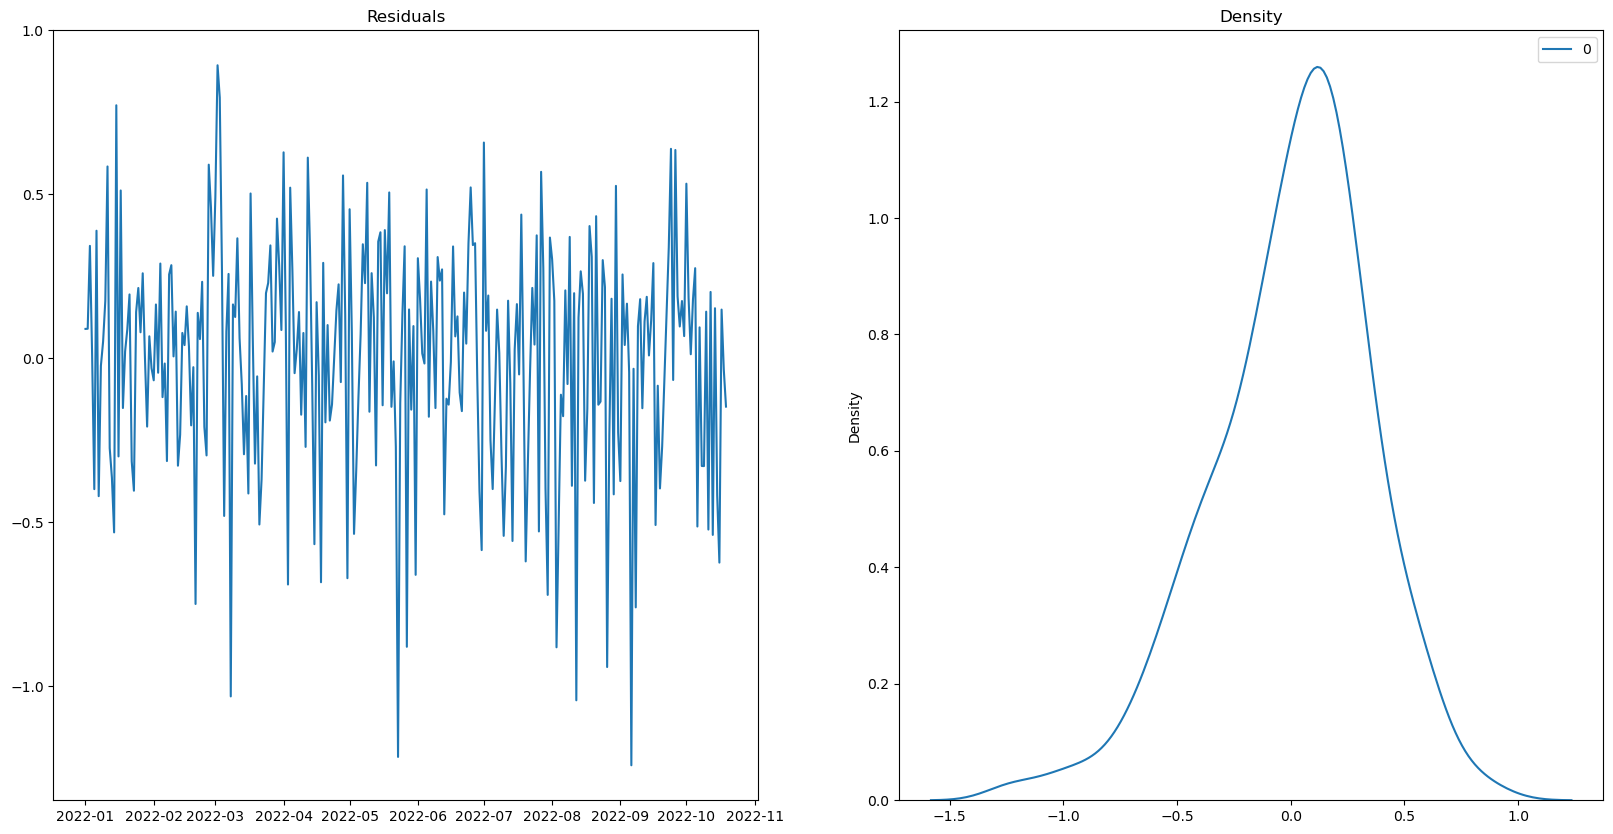

In [77]:
residuals = pd.DataFrame(model_result.resid)

plt.figure(figsize=(20,10))

plt.subplot(121)
plt.plot(residuals)
plt.title('Residuals')

plt.subplot(122)
sns.kdeplot(residuals)
plt.title('Density')

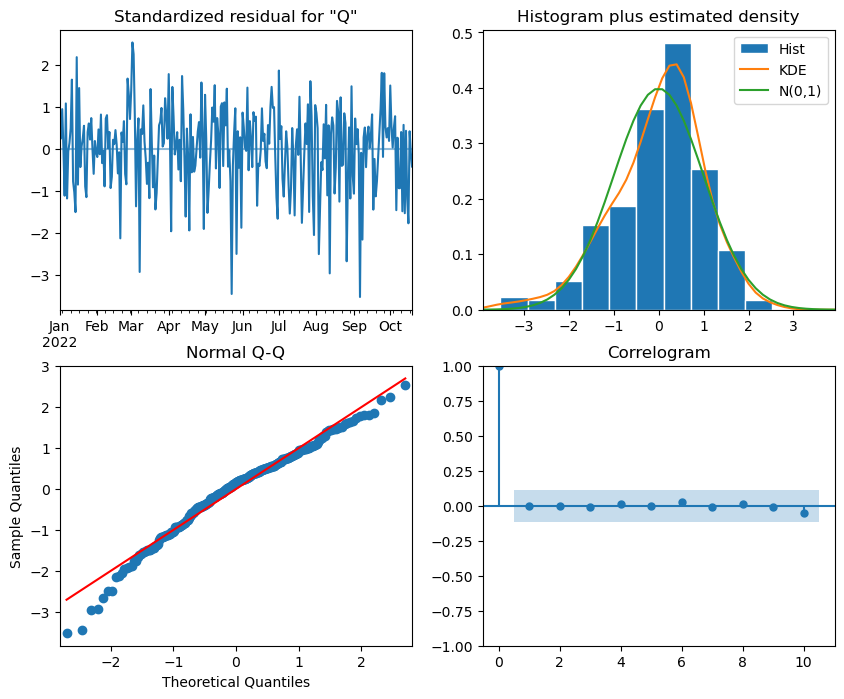

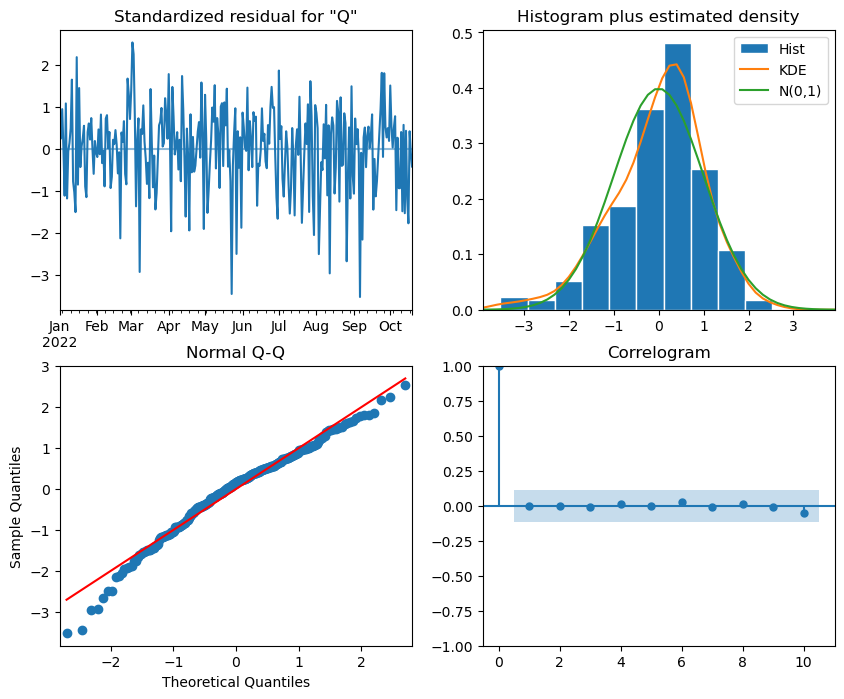

In [78]:
model_result.plot_diagnostics(figsize=(10,8))

<ul>Plot diagnostic interpretation:
    <li>Standard residual: residual error fluctuate around a mean of zero, so the prediction is not far away from actual data</li>
    <li>Histogram: tend to be normally distributed</li>
    <li>Theoretical Quantities: mostly perfectly in red line.</li>
    <li>Correlogram: residual errors are not autocorrelated.</li>
    </ul>
<p><b>Summary:</b> the model seems to be a good fit

<h3> Model Performance </h3>

In [79]:
y_true = test['Qty']
y_pred = test.copy()
y_pred['Arima'] = model_result.forecast(len(test['Qty']))
y_pred = y_pred['Arima']

y_true, y_pred = np.array(y_true), np.array(y_pred)

mse = ((y_true-y_pred)**2).mean()

print('Mean Absolute Error for ARIMA Forecast is ', round(np.mean(np.abs(y_true-y_pred)),2))
print('Mean Absolute Percentage Error for ARIMA Forecast is ', round(np.mean(np.abs((y_true-y_pred)/y_true)*100),2),'%')
print('Mean Squared Error for ARIMA Forecast is ', round(mse,2))
print('Root Mean Squared Error for ARIMA Forecast is ', round(np.sqrt(mse),2))

Mean Absolute Error for ARIMA Forecast is  0.24
Mean Absolute Percentage Error for ARIMA Forecast is  6.53 %
Mean Squared Error for ARIMA Forecast is  0.08
Root Mean Squared Error for ARIMA Forecast is  0.29


<ul>Model Performance Interpretation :
    <li>MAE: ARIMA model's forcasts differ from the actual values by approximately 0.24 units</li>
    <li>MAPE: ARIMA model's forecasts deviate from the actual values by about 6.53%</li>
    <li>MSE: lower MSE values indicates better model performance. 0.08 indicates ARIMA model's forecasts have on average squared differences of 0.08 with the actual values</li>
    <li>ARIMA model's forecasts have a root mean squared difference of approximately 0.29 with the actual values</li>
    </ul>

<h1> Clustering </h1>

<h2> Split Dataset into Train, Test and Validation </h2>